# Spectrogram Plot
This notebook is used for testing and benchmarking performance of spectrogram plot and table of spectrogram plots.

In [1]:
from time import sleep
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import generate_payload as gp
import utils
import plots
from producer import produce


### Plot Payload Size Statistics

In [ ]:
# generate payload size data for the benchmark

data = []
unit = "MB"

for num_spectrograms in range(100, 1100, 100):
    for num_channels in range(10000, 80000, 10000):
        _, size = gp.spectrogram_protobus(num_spectrograms, num_channels)
        a = {
            "size" : utils.convert_bytes(size, unit),
            "spectrograms": num_spectrograms,
            "channels": num_channels,
            "encoding": "ProtoBuf",
        }
        data.append(a)
        
        _, size = gp.spectrogram_json(num_spectrograms, num_channels)
        b = {
            "size" : utils.convert_bytes(size, unit),
            "spectrograms": num_spectrograms,
            "channels": num_channels,
            "encoding": "JSON (utf-8)",
        }
        data.append(b)

In [ ]:
# prepare data for plotting

df = pd.DataFrame(data)

col_size = df["size"]
max = col_size.max()
min = col_size.min()

# select ProtoBuf rows
df1 = df.loc[df["encoding"] == "ProtoBuf"]
df1 = df1.pivot("channels", "spectrograms", "size")
df1 = df1.sort_values(by=['channels'],  ascending=False)

# select JSON rows
df2 = df.loc[df["encoding"] == "JSON (utf-8)"]
df2 = df2.pivot("channels", "spectrograms", "size")
df2 = df2.sort_values(by=['channels'],  ascending=False)

<AxesSubplot:xlabel='spectrograms', ylabel='channels'>

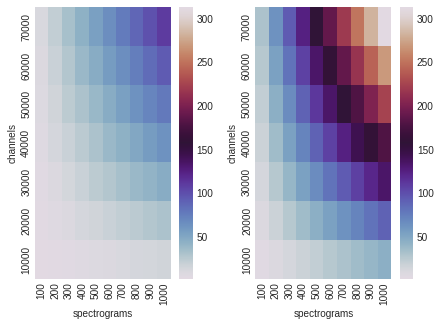

In [29]:

fig, ax =plt.subplots(1,2, figsize=(7,5))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)

sns.heatmap(df1, cmap="twilight", ax=ax[0], vmin=min, vmax=max)
sns.heatmap(df2, cmap="twilight", ax=ax[1], vmin=min, vmax=max)

### Plot Payload Decoding Time

### Browser Performance

#### A Spectrogram

In [34]:
# generate payload and send to producer of broker
channels = []
for num_channels in range(10000, 600000, 10000):
    sleep(1)
    channels.append(num_channels)
    payload, _ = gp.spectrogram_protobus(1, num_channels)
    await produce(payload, "spectrogram-protobuf")


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7f1a1d5d9940>
Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7f1a1e32f790>
Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7f1a2aab9df0>
Task was destroyed but it is pending!
task: <Task pending name='Task-24764' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7f1a2aab98b0>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-24774' coro=<Sender._sender_routine() done, defined at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:81> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7f1a2335ad00>()]> cb=[Sender._f

CancelledError: 

#### Spectrogram Table

In [11]:
# generate payload and send to producer of broker
for num_spectrograms in range(100, 1100, 100):
    for num_channels in range(1000, 7000, 100):
        sleep(1)
        payload, _ = gp.spectrogram_protobus(num_spectrograms, num_channels)
        await produce(payload, "spectrogram-protobuf")


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7f1a2c084eb0>
Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7f1a2c084eb0>
Task was destroyed but it is pending!
task: <Task pending name='Task-2588' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7f1a31e94b20>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-2599' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7f1a30bbea90>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-2609' coro=<Sender._sender_routin